In [1]:
# Read System Parameters
import sys

# Multidimensional arrays
import numpy as np

#Manipulation and Analyze Data
import pandas as pd

#Advance Mathematical Functions
import scipy as sp
from scipy import stats

#Visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#Feature Engineering and Machine Learning Algorithm
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Encode Data and Suppress Warnings
import category_encoders as ce
import warnings

#Summarize software libraries used.
print('Libraries used in this project:')
print('- Python {}'.format(sys.version))
print('- Numpy {}'.format(np.__version__))
print('- Pandas {}'.format(pd.__version__))
print('- Scipy {}'.format(sp.__version__))
print('- Matplotlib {}'.format(matplotlib.__version__))
print('- Seaborn {}'.format(sns.__version__))
print('- Scikit-Learn {}'.format(sklearn.__version__))
print('- Category Encoders {}'.format(ce.__version__))


Libraries used in this project:
- Python 3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]
- Numpy 1.21.5
- Pandas 1.4.2
- Scipy 1.7.3
- Matplotlib 3.5.1
- Seaborn 0.11.2
- Scikit-Learn 1.0.2
- Category Encoders 2.5.1.post0


In [2]:
user_data = pd.read_pickle("users_data_cleaned.pickle")

## Generate a box plot for age

In [3]:
user_data['age'].describe()

count    45209.000000
mean        40.935853
std         10.618653
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

<AxesSubplot:xlabel='age'>

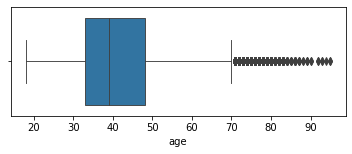

In [4]:
plt.figure(figsize=(6,2))
sns.boxplot(x=user_data['age'],linewidth=0.9)

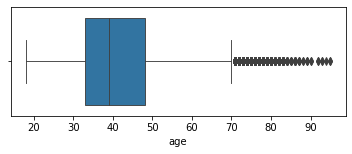

In [5]:
plt.figure(figsize=(6,2))
sns.boxplot(x=user_data['age'],linewidth=0.9);

## Generate a violin plot for age

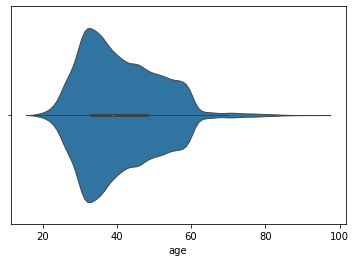

In [6]:
sns.violinplot(x=user_data['age'], linewidth=0.9);

In [7]:
user_data['number_transactions'].describe()

count    35210.000000
mean         3.977052
std          3.814329
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         20.000000
Name: number_transactions, dtype: float64

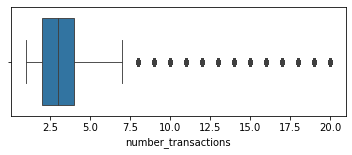

In [8]:
plt.figure(figsize=(6,2))
sns.boxplot(x=user_data['number_transactions'], linewidth=0.9);

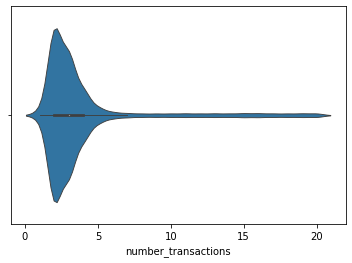

In [9]:
sns.violinplot(x=user_data['number_transactions'], linewidth=0.9);

## Generate a line plot for total_amount_usd

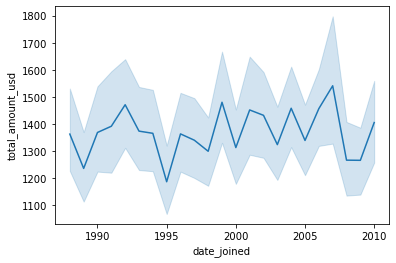

In [10]:
years = user_data['date_joined'].dt.year
sns.lineplot(data=user_data, x=years,
             y='total_amount_usd', estimator=np.mean);

## Generate Scatter plots comparing total_amount_usd to number_transaction

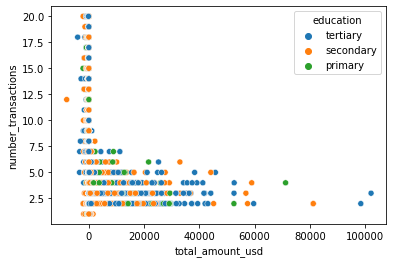

In [11]:
# scatter plot perbandingan total amount usd ke jumlah transkasi
sns.scatterplot(data=user_data, x='total_amount_usd',
               y='number_transactions', hue='education');

## Generate bar charts for job

In [12]:
user_job_dist = user_data['job'].value_counts(dropna=False)

user_job_dist

blue-collar      9731
management       9457
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
None              288
Name: job, dtype: int64

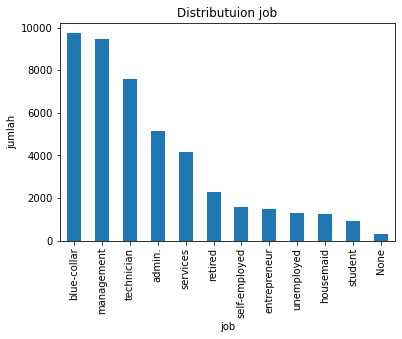

In [13]:
#vertikal bar chart

user_job_dist.plot(kind='bar')
plt.title('Distributuion job');
plt.xlabel('job');
plt.ylabel('jumlah');

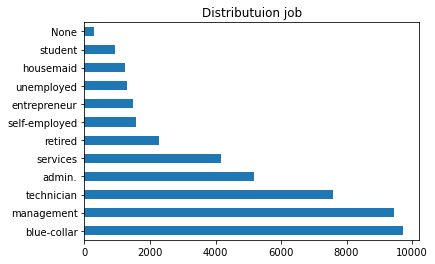

In [14]:
#horizontal bar chart
user_job_dist.plot(kind='barh')
plt.title('Distributuion job');

In [15]:
user_marital = user_data['marital'].value_counts(dropna=False)
user_marital

married     27212
single      12790
divorced     5207
Name: marital, dtype: int64

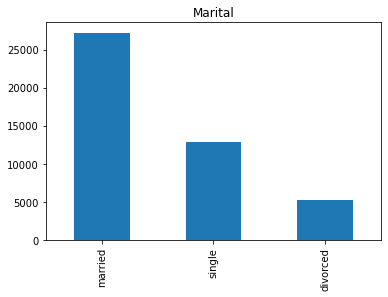

In [16]:
user_marital.plot(kind='bar')
plt.title('Marital');

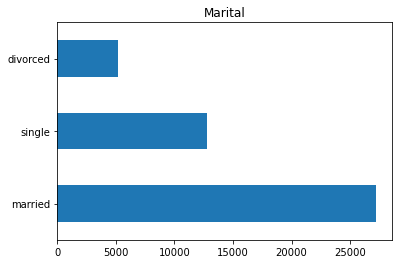

In [17]:
user_marital.plot(kind='barh')
plt.title('Marital');

In [18]:
education = user_data['education'].value_counts(dropna=False)
education

secondary    23202
tertiary     13300
primary       6850
None          1857
Name: education, dtype: int64

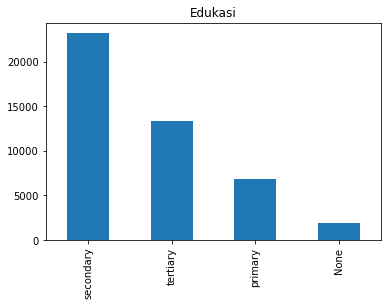

In [19]:
education.plot(kind='bar')
plt.title('Edukasi');

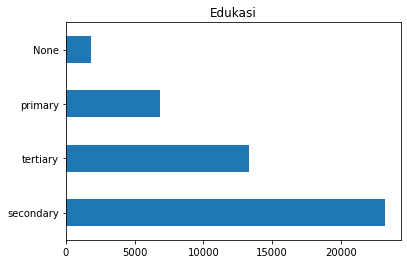

In [20]:
education.plot(kind='barh')
plt.title('Edukasi');

In [21]:
contact = user_data['contact'].value_counts(dropna=False)
contact

cellular     29285
None         13018
telephone     2906
Name: contact, dtype: int64

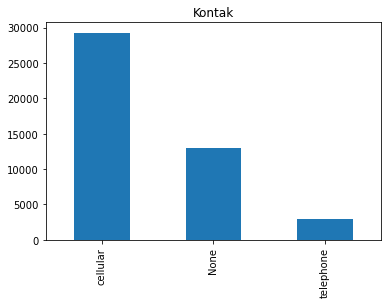

In [22]:
contact.plot(kind='bar')
plt.title('Kontak');

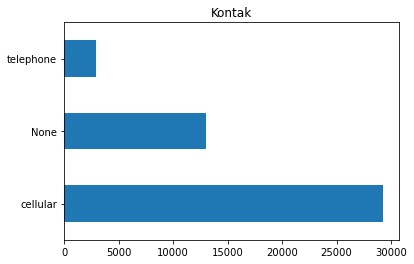

In [23]:
contact.plot(kind='barh')
plt.title('Kontak');

In [24]:
poutcome = user_data['poutcome'].value_counts(dropna=False)
poutcome

None       36957
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

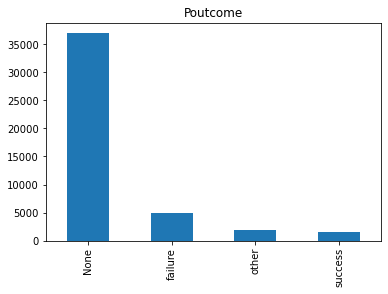

In [25]:
poutcome.plot(kind='bar')
plt.title('Poutcome');

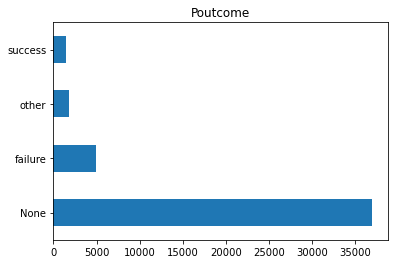

In [26]:
poutcome.plot(kind='barh')
plt.title('Poutcome');

In [27]:
default = user_data['default'].value_counts(dropna=False)
default

False    44394
True       815
Name: default, dtype: int64

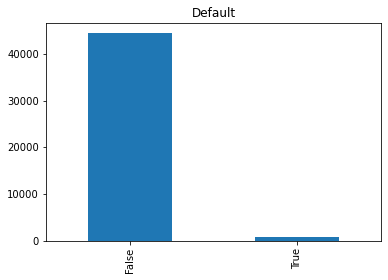

In [28]:
default.plot(kind='bar')
plt.title('Default');

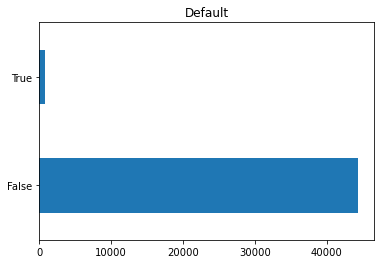

In [29]:
default.plot(kind='barh')
plt.title('Default');

In [30]:
device = user_data['device'].value_counts(dropna=False)
device

mobile     27504
desktop    12112
tablet      5499
None          94
Name: device, dtype: int64

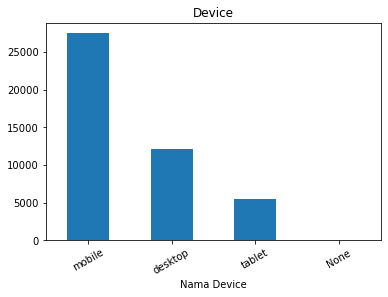

In [31]:
device.plot(kind='bar')
plt.title('Device');
plt.xlabel('Nama Device');
plt.xticks(rotation=30);

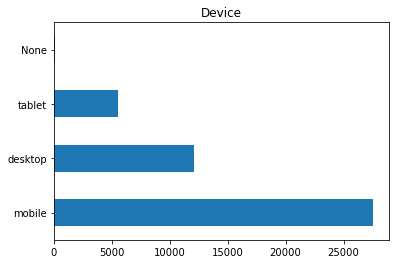

In [32]:
device.plot(kind='barh')
plt.title('Device');

## Generate a heatmap for the feature correlations

In [33]:
corr_matrix = user_data.corr()
corr_matrix

,number_transactions,total_amount_usd,age,default,housing,loan,duration,campaign,pdays,previous,term_deposit
number_transactions,1.000000,-0.163409,-0.008813,0.138838,0.030429,0.075319,-0.017220,0.026431,-0.030751,-0.023046,-0.053390
total_amount_usd,-0.163409,1.000000,0.095839,-0.065390,-0.066857,-0.084526,0.022586,-0.017274,0.006435,0.016952,0.050785
age,-0.008813,0.095839,1.000000,-0.017875,-0.185552,-0.015641,-0.004645,0.004767,-0.023745,0.001297,0.025168
default,0.138838,-0.065390,-0.017875,1.000000,-0.006020,0.077232,-0.010017,0.016819,-0.029982,-0.018331,-0.022421
housing,0.030429,-0.066857,-0.185552,-0.006020,1.000000,0.041341,0.005041,-0.023583,0.124197,0.037087,-0.139161
loan,0.075319,-0.084526,-0.015641,0.077232,0.041341,1.000000,-0.012395,0.009972,-0.022762,-0.011048,-0.068193
duration,-0.017220,0.022586,-0.004645,-0.010017,0.005041,-0.012395,1.000000,-0.084551,-0.001549,0.001213,0.394549
campaign,0.026431,-0.017274,0.004767,0.016819,-0.023583,0.009972,-0.084551,1.000000,-0.088636,-0.032860,-0.073179
pdays,-0.030751,0.006435,-0.023745,-0.029982,0.124197,-0.022762,-0.001549,-0.088636,1.000000,0.454817,0.103616
previous,-0.023046,0.016952,0.001297,-0.018331,0.037087,-0.011048,0.001213,-0.032860,0.454817,1.000000,0.093232


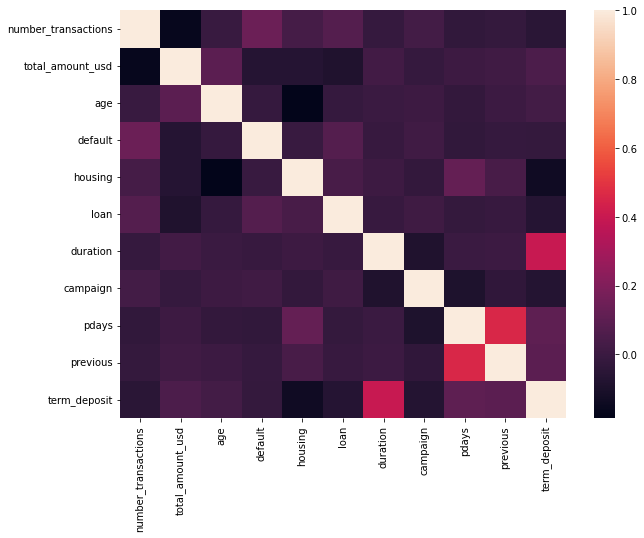

In [34]:
fig = plt.figure(figsize=(10,7.5))
sns.heatmap(corr_matrix);

## Format the heatmap to make it easier to read

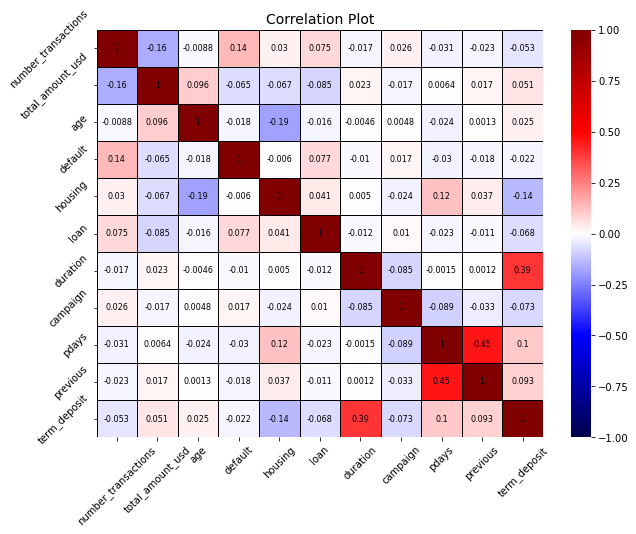

In [35]:
fig = plt.figure(figsize = (10,7.5))
sns.heatmap(corr_matrix,
           cmap='seismic',
           linewidths=0.75,
           linecolor='black',
           cbar=True,
           vmin=-1,
           vmax=1,
           annot=True,
           annot_kws={'size':8, 'color':'black'})
plt.tick_params(labelsize=10, rotation=45)
plt.title('Correlation Plot', size=14);

## Identify Missing Value

In [36]:
user_data.isnull().sum()

user_id                    0
number_transactions     9999
total_amount_usd        9999
age                        0
job                      288
marital                    0
education               1857
default                    0
housing                    0
loan                       0
contact                13018
duration                   0
campaign                   0
pdays                      0
previous                   0
poutcome               36957
term_deposit               0
date_joined               30
device                    94
dtype: int64

## Identify the percentage of missing value for each feature

In [37]:
percent_missing=user_data.isnull().mean()
percent_missing

user_id                0.000000
number_transactions    0.221173
total_amount_usd       0.221173
age                    0.000000
job                    0.006370
marital                0.000000
education              0.041076
default                0.000000
housing                0.000000
loan                   0.000000
contact                0.287952
duration               0.000000
campaign               0.000000
pdays                  0.000000
previous               0.000000
poutcome               0.817470
term_deposit           0.000000
date_joined            0.000664
device                 0.002079
dtype: float64

## Generate a Missing value report

In [38]:
def missing_value_pct_df(data):
    """Create a DataFrame to summarize missing value"""
    
    percent_missing = data.isnull().mean()
    missing_value_df = pd.DataFrame(percent_missing).reset_index()
    
    missing_value_df = missing_value_df.rename(columns={'index':'column_name',
                                                       0: 'percent_missing'})
    
    # Multiply by 100 and round to 2 decimal places
    missing_value_df['percent_missing'] = missing_value_df['percent_missing'].apply(lambda x: round(x * 100, 2))
    
    missing_value_df = missing_value_df.sort_values(by = ['percent_missing'], ascending=False)
    return missing_value_df

In [39]:
missing_value_df = missing_value_pct_df(user_data)
missing_value_df

,column_name,percent_missing
15,poutcome,81.75
10,contact,28.80
2,total_amount_usd,22.12
1,number_transactions,22.12
6,education,4.11
4,job,0.64
18,device,0.21
17,date_joined,0.07
12,campaign,0.00
16,term_deposit,0.00


## Remove features with a high percentage of missing values

In [40]:
# threshold above which to drop feature

threshold = 80

cols_to_drop = list(missing_value_df[missing_value_df['percent_missing'] 
                                     > threshold]['column_name'])
print('Number of features to drop:',
     missing_value_df[missing_value_df['percent_missing']>threshold].shape[0])

print(f'Features with missing values greater than {threshold}%:', cols_to_drop)


Number of features to drop: 1
Features with missing values greater than 80%: ['poutcome']


In [41]:
#axis = 1 adalah kolom
#axis = 0 adalah baris
user_data_cleaned = user_data.drop(cols_to_drop, axis=1)

In [42]:
#confirm feature was dropped

missing_value_df = missing_value_pct_df(user_data_cleaned)

missing_columns = list(missing_value_df[missing_value_df['percent_missing'] > 0]['column_name'])

print('Number of features with missing value:', len(missing_columns))

Number of features with missing value: 7


In [43]:
print (missing_columns);

['contact', 'total_amount_usd', 'number_transactions', 'education', 'job', 'device', 'date_joined']


## Identify numerical data with missing values

In [44]:
dtypes = ['int64','float64']

numerical_columns = list(user_data_cleaned.select_dtypes(dtypes).columns)

print('Numerical features with missing values:', 
     list(set(numerical_columns).intersection(missing_columns)))

Numerical features with missing values: ['number_transactions', 'total_amount_usd']


In [45]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45209 entries, 0 to 45215
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              45209 non-null  object        
 1   number_transactions  35210 non-null  float64       
 2   total_amount_usd     35210 non-null  float64       
 3   age                  45209 non-null  int64         
 4   job                  44921 non-null  object        
 5   marital              45209 non-null  object        
 6   education            43352 non-null  object        
 7   default              45209 non-null  bool          
 8   housing              45209 non-null  bool          
 9   loan                 45209 non-null  bool          
 10  contact              32191 non-null  object        
 11  duration             45209 non-null  int64         
 12  campaign             45209 non-null  int64         
 13  pdays                45209 non-

## Impute missing data values for total_amount_usd

In [46]:
#find a sample user with missing value

sample_user = user_data_cleaned[user_data_cleaned['total_amount_usd'].isnull()].sample(1).user_id

sample_user

34115    8838c14a-6bf0-4492-be41-7d1cecfb6eb0
Name: user_id, dtype: object

In [47]:
user_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45209 entries, 0 to 45215
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              45209 non-null  object        
 1   number_transactions  35210 non-null  float64       
 2   total_amount_usd     35210 non-null  float64       
 3   age                  45209 non-null  int64         
 4   job                  44921 non-null  object        
 5   marital              45209 non-null  object        
 6   education            43352 non-null  object        
 7   default              45209 non-null  bool          
 8   housing              45209 non-null  bool          
 9   loan                 45209 non-null  bool          
 10  contact              32191 non-null  object        
 11  duration             45209 non-null  int64         
 12  campaign             45209 non-null  int64         
 13  pdays                45209 non-

In [48]:
# print mean of total_amount_usd

print('Mean total_amount_usd:',round(user_data_cleaned['total_amount_usd'].mean(),2))

# impute missing values for total_amount_usd with mean

user_data_cleaned['total_amount_usd'].fillna(round(user_data_cleaned['total_amount_usd'].mean(),2),inplace = True)

Mean total_amount_usd: 1369.42


In [49]:
user_data_cleaned[user_data_cleaned.user_id.isin(sample_user)]['total_amount_usd']

34115    1369.42
Name: total_amount_usd, dtype: float64

## Replace missing values for number_transactions with 0

In [50]:
user_data_cleaned['number_transactions'].fillna(0,inplace=True)

In [51]:
user_data_cleaned[user_data_cleaned.user_id.isin(sample_user)]['number_transactions']

34115    0.0
Name: number_transactions, dtype: float64

In [52]:
user_data_cleaned

,user_id,number_transactions,total_amount_usd,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,term_deposit,date_joined,device
0,9231c446-cb16-4b2b-a7f7-ddfc8b25aaf6,3.0,2143.00,58,management,married,tertiary,False,True,False,None,261,1,-1,0,False,1998-08-23,mobile
1,bb92765a-08de-4963-b432-496524b39157,0.0,1369.42,44,technician,single,secondary,False,True,False,None,151,1,-1,0,False,2008-07-15,desktop
2,573de577-49ef-42b9-83da-d3cfb817b5c1,2.0,2.00,33,entrepreneur,married,secondary,False,True,True,None,76,1,-1,0,False,2002-06-04,mobile
3,d6b66b9d-7c8f-4257-a682-e136f640b7e3,0.0,1369.42,47,blue-collar,married,None,False,True,False,None,92,1,-1,0,False,1995-06-29,tablet
4,fade0b20-7594-4d9a-84cd-c02f79b1b526,1.0,1.00,33,None,single,None,False,False,False,None,198,1,-1,0,False,1995-08-01,mobile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45211,a218c1d6-880a-4431-a314-a1bd3dc36b21,2.0,825.00,51,technician,married,tertiary,False,False,False,cellular,977,3,-1,0,True,2002-12-28,desktop
45212,6a6bf402-9416-4e71-97c6-727e8298a3a5,4.0,1729.00,71,retired,divorced,primary,False,False,False,cellular,456,2,-1,0,True,2010-11-18,desktop
45213,be32ba96-b178-4b54-b32a-f75b714793df,2.0,5715.00,72,retired,married,secondary,False,False,False,cellular,1127,5,184,3,True,1996-06-18,mobile
45214,44623a48-4e9b-48fd-b155-a17d1c06a754,0.0,1369.42,57,blue-collar,married,secondary,False,False,False,telephone,508,4,-1,0,False,1996-09-14,desktop


## Identify categorical data with missing values

In [53]:
categorical_columns = list(user_data_cleaned.select_dtypes(['object']).columns)

print('Categorical features with missing values:',
     list(set(categorical_columns).intersection(missing_columns)))

Categorical features with missing values: ['education', 'device', 'job', 'contact']


In [54]:
categorical_columns

['user_id', 'job', 'marital', 'education', 'contact', 'device']

## Replace categorical missing values with 'Unknown'

In [56]:
#kategori=['device', 'contact', 'job', 'education']
#user_data_cleaned.kategori.fillna('Unknown',inplace = True)

In [57]:
user_data_cleaned.device.fillna('Unknown',inplace = True)
user_data_cleaned.contact.fillna('Unknown',inplace = True)
user_data_cleaned.job.fillna('Unknown',inplace = True)
user_data_cleaned.education.fillna('Unknown',inplace = True)

In [58]:
user_data_cleaned.device.value_counts()

mobile     27504
desktop    12112
tablet      5499
Unknown       94
Name: device, dtype: int64

## Check if there are any other missing values

In [59]:
missing_value_df = missing_value_pct_df(user_data_cleaned)
missing_columns = list(missing_value_df[missing_value_df['percent_missing']
                                        >0]['column_name'])

print('Number of features with missing values:', len(missing_columns))
print('Features with missing values', missing_columns)

Number of features with missing values: 1
Features with missing values ['date_joined']


## Remove all rows where date_joined is missing

In [67]:
print('Number of users with corrupted data:',
     user_data_cleaned[user_data_cleaned['date_joined'].isnull()].shape[0])

Number of users with corrupted data: 30


In [88]:
# Remove corrupted data

users_data_cleaned = user_data_cleaned[~user_data_cleaned['date_joined'].isnull()]

In [80]:
# Check to see if any corrupted rows remain

print('Number of users with corrupted data:',
     user_data_cleaned[user_data_cleaned['date_joined'].isnull()].shape[0])

Number of users with corrupted data: 30


## Perform one last check for missing values

In [89]:
missing_value_df = missing_value_pct_df(users_data_cleaned)
missing_columns = list(missing_value_df[missing_value_df['percent_missing']>0]['column_name'])

print('Number of features with missing values:', len(missing_columns))

Number of features with missing values: 0


In [74]:
print(missing_columns)

[]


In [78]:
user_data_cleaned

,user_id,number_transactions,total_amount_usd,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,term_deposit,date_joined,device
0,9231c446-cb16-4b2b-a7f7-ddfc8b25aaf6,3.0,2143.00,58,management,married,tertiary,False,True,False,Unknown,261,1,-1,0,False,1998-08-23,mobile
1,bb92765a-08de-4963-b432-496524b39157,0.0,1369.42,44,technician,single,secondary,False,True,False,Unknown,151,1,-1,0,False,2008-07-15,desktop
2,573de577-49ef-42b9-83da-d3cfb817b5c1,2.0,2.00,33,entrepreneur,married,secondary,False,True,True,Unknown,76,1,-1,0,False,2002-06-04,mobile
3,d6b66b9d-7c8f-4257-a682-e136f640b7e3,0.0,1369.42,47,blue-collar,married,Unknown,False,True,False,Unknown,92,1,-1,0,False,1995-06-29,tablet
4,fade0b20-7594-4d9a-84cd-c02f79b1b526,1.0,1.00,33,Unknown,single,Unknown,False,False,False,Unknown,198,1,-1,0,False,1995-08-01,mobile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45211,a218c1d6-880a-4431-a314-a1bd3dc36b21,2.0,825.00,51,technician,married,tertiary,False,False,False,cellular,977,3,-1,0,True,2002-12-28,desktop
45212,6a6bf402-9416-4e71-97c6-727e8298a3a5,4.0,1729.00,71,retired,divorced,primary,False,False,False,cellular,456,2,-1,0,True,2010-11-18,desktop
45213,be32ba96-b178-4b54-b32a-f75b714793df,2.0,5715.00,72,retired,married,secondary,False,False,False,cellular,1127,5,184,3,True,1996-06-18,mobile
45214,44623a48-4e9b-48fd-b155-a17d1c06a754,0.0,1369.42,57,blue-collar,married,secondary,False,False,False,telephone,508,4,-1,0,False,1996-09-14,desktop
